<a href="https://colab.research.google.com/github/mdurgasrikari/Durga_Srikari_INFO5731_Spring2024/blob/main/Maguluri_Durga_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [1]:
#In this program we will demonstrate carious text classification models and their performance evaluation. In addition, we will conduct 10-fold cross-validation. We will demonstrate the following
#algorithms: MultinominalNB, SVM, KNN, Decision Tree, Random Forest, XGBoost, Word2Vec, and BERT. Also, we will evaluate the following measurements: Accuracy, Recall, Precision, F-1 score.

import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Get the list of stopwords for English
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#This Program initialized following classifiers including Multinomial Naive Bayes, SVM, K-Nearest Neighbors, Decision Tree, Random Forest, XGBoost,
# Gaussian Naive Bayes, Word2Vec, and BERT models, use the dataset to train the model and evaluate their performance using cross-validation and test data. Finally, compare the results
pip install xgboost

In [3]:
# Reading the dataset and applying the basic cleaning and preprocessing steps

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import gensim.downloader as api
from gensim.models import KeyedVectors
import torch
from transformers import BertTokenizer, BertModel
from sklearn.naive_bayes import GaussianNB
from nltk.stem import PorterStemmer
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Initialize lists to store results
results = []

# Preprocessing and Cleaning
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocessing and cleaning function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

train_df['Review'] = train_df['Review'].apply(preprocess_text)
test_df['Review'] = test_df['Review'].apply(preprocess_text)

Multinominal NB

In [4]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['Review'], train_df['Sentiment'], test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(test_df['Review'])

# Implement Multinomial Naive Bayes Algorithm
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_nb = nb_classifier.predict(X_val_tfidf)
accuracy_nb = accuracy_score(y_val, y_pred_val_nb)
recall_nb = recall_score(y_val, y_pred_val_nb)
precision_nb = precision_score(y_val, y_pred_val_nb)
f1_nb = f1_score(y_val, y_pred_val_nb)

# Final Evaluation on Test Data
y_pred_test_nb = nb_classifier.predict(X_test_tfidf)
test_accuracy_nb = accuracy_score(test_df['Sentiment'], y_pred_test_nb)

# Append results to list
results.append({'Model': 'Multinomial Naive Bayes',
                'Cross-Validation Accuracy': cv_scores_nb.mean(),
                'Accuracy': accuracy_nb,
                'Recall': recall_nb,
                'Precision': precision_nb,
                'F1 Score': f1_nb,
                'Test Accuracy': test_accuracy_nb})

SVM

In [5]:
# Initialize SVM classifier
svm_classifier = SVC()

# Train SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_svm = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_svm = svm_classifier.predict(X_val_tfidf)
accuracy_svm = accuracy_score(y_val, y_pred_val_svm)
recall_svm = recall_score(y_val, y_pred_val_svm)
precision_svm = precision_score(y_val, y_pred_val_svm)
f1_svm = f1_score(y_val, y_pred_val_svm)

# Final Evaluation on Test Data
y_pred_test_svm = svm_classifier.predict(X_test_tfidf)
test_accuracy_svm = accuracy_score(test_df['Sentiment'], y_pred_test_svm)

# Append results to list
results.append({'Model': 'SVM',
                'Cross-Validation Accuracy': cv_scores_svm.mean(),
                'Accuracy': accuracy_svm,
                'Recall': recall_svm,
                'Precision': precision_svm,
                'F1 Score': f1_svm,
                'Test Accuracy': test_accuracy_svm})

In [6]:
results

[{'Model': 'Multinomial Naive Bayes',
  'Cross-Validation Accuracy': 0.7778180714318355,
  'Accuracy': 0.791907514450867,
  'Recall': 0.8835904628330996,
  'Precision': 0.7544910179640718,
  'F1 Score': 0.8139534883720929,
  'Test Accuracy': 0.7924217462932455},
 {'Model': 'SVM',
  'Cross-Validation Accuracy': 0.7635490041193098,
  'Accuracy': 0.8005780346820809,
  'Recall': 0.8653576437587658,
  'Precision': 0.7741530740276035,
  'F1 Score': 0.8172185430463577,
  'Test Accuracy': 0.7918725974739155}]

KNN

In [7]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Train KNN classifier
knn_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_knn = knn_classifier.predict(X_val_tfidf)
accuracy_knn = accuracy_score(y_val, y_pred_val_knn)
recall_knn = recall_score(y_val, y_pred_val_knn)
precision_knn = precision_score(y_val, y_pred_val_knn)
f1_knn = f1_score(y_val, y_pred_val_knn)

# Final Evaluation on Test Data
y_pred_test_knn = knn_classifier.predict(X_test_tfidf)
test_accuracy_knn = accuracy_score(test_df['Sentiment'], y_pred_test_knn)

# Append results to list
results.append({'Model': 'K-Nearest Neighbors',
                'Cross-Validation Accuracy': cv_scores_knn.mean(),
                'Accuracy': accuracy_knn,
                'Recall': recall_knn,
                'Precision': precision_knn,
                'F1 Score': f1_knn,
                'Test Accuracy': test_accuracy_knn})

Decision Tree

In [8]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train Decision Tree classifier
dt_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_dt = cross_val_score(dt_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_dt = dt_classifier.predict(X_val_tfidf)
accuracy_dt = accuracy_score(y_val, y_pred_val_dt)
recall_dt = recall_score(y_val, y_pred_val_dt)
precision_dt = precision_score(y_val, y_pred_val_dt)
f1_dt = f1_score(y_val, y_pred_val_dt)

# Final Evaluation on Test Data
y_pred_test_dt = dt_classifier.predict(X_test_tfidf)
test_accuracy_dt = accuracy_score(test_df['Sentiment'], y_pred_test_dt)

# Append results to list
results.append({'Model': 'Decision Tree',
                'Cross-Validation Accuracy': cv_scores_dt.mean(),
                'Accuracy': accuracy_dt,
                'Recall': recall_dt,
                'Precision': precision_dt,
                'F1 Score': f1_dt,
                'Test Accuracy': test_accuracy_dt})

Random Forest

In [9]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train Random Forest classifier
rf_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_rf = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_rf = rf_classifier.predict(X_val_tfidf)
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
recall_rf = recall_score(y_val, y_pred_val_rf)
precision_rf = precision_score(y_val, y_pred_val_rf)
f1_rf = f1_score(y_val, y_pred_val_rf)

# Final Evaluation on Test Data
y_pred_test_rf = rf_classifier.predict(X_test_tfidf)
test_accuracy_rf = accuracy_score(test_df['Sentiment'], y_pred_test_rf)

# Append results to list
results.append({'Model': 'Random Forest',
                'Cross-Validation Accuracy': cv_scores_rf.mean(),
                'Accuracy': accuracy_rf,
                'Recall': recall_rf,
                'Precision': precision_rf,
                'F1 Score': f1_rf,
                'Test Accuracy': test_accuracy_rf})

XGBoost

In [10]:
# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Train XGBoost classifier
xgb_classifier.fit(X_train_tfidf, y_train)

# 10-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_classifier, X_train_tfidf, y_train, cv=10)

# Performance Evaluation
y_pred_val_xgb = xgb_classifier.predict(X_val_tfidf)
accuracy_xgb = accuracy_score(y_val, y_pred_val_xgb)
recall_xgb = recall_score(y_val, y_pred_val_xgb)
precision_xgb = precision_score(y_val, y_pred_val_xgb)
f1_xgb = f1_score(y_val, y_pred_val_xgb)

# Final Evaluation on Test Data
y_pred_test_xgb = xgb_classifier.predict(X_test_tfidf)
test_accuracy_xgb = accuracy_score(test_df['Sentiment'], y_pred_test_xgb)

# Append results to list
results.append({'Model': 'XGBoost',
                'Cross-Validation Accuracy': cv_scores_xgb.mean(),
                'Accuracy': accuracy_xgb,
                'Recall': recall_xgb,
                'Precision': precision_xgb,
                'F1 Score': f1_xgb,
                'Test Accuracy': test_accuracy_xgb})

Word2Vec

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from gensim.models import KeyedVectors
import gensim.downloader as api

# Assuming you have your data loaded and preprocessed
# X_train, X_val, y_train, y_val, test_df are assumed to be defined

# Download the Google News Word2Vec model. Loading an already pretrained model
word2vec_model_path = api.load("word2vec-google-news-300", return_path=True)

# Load the pre-trained Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

# Convert each review into a fixed-size vector by averaging Word2Vec embeddings
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in model:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

def word2vec_tokenize(text):
    return text.split()  # Tokenize text by splitting on spaces

# Tokenize and convert reviews to Word2Vec vectors
X_train_word2vec = [average_word_vectors(word2vec_tokenize(review), word2vec_model, word2vec_model.vector_size) for review in X_train]
X_val_word2vec = [average_word_vectors(word2vec_tokenize(review), word2vec_model, word2vec_model.vector_size) for review in X_val]
X_test_word2vec = [average_word_vectors(word2vec_tokenize(review), word2vec_model, word2vec_model.vector_size) for review in test_df['Review']]

# Convert to numpy arrays
X_train_word2vec = np.array(X_train_word2vec)
X_val_word2vec = np.array(X_val_word2vec)
X_test_word2vec = np.array(X_test_word2vec)

# Scale the Word2Vec vectors to be non-negative
scaler = MinMaxScaler()
X_train_word2vec_scaled = scaler.fit_transform(X_train_word2vec)
X_val_word2vec_scaled = scaler.transform(X_val_word2vec)
X_test_word2vec_scaled = scaler.transform(X_test_word2vec)

# Define classifiers
classifiers_word2vec = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}


# Loop through each classifier
for clf_name, clf in classifiers_word2vec.items():
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(clf, X_train_word2vec_scaled, y_train, cv=10)

    # Performance Evaluation
    accuracy = np.mean(cv_scores)
    clf.fit(X_train_word2vec_scaled, y_train)
    y_pred_val = clf.predict(X_val_word2vec_scaled)
    recall = recall_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)

    # Final Evaluation on Test Data
    y_pred_test = clf.predict(X_test_word2vec_scaled)
    test_accuracy = accuracy_score(test_df['Sentiment'], y_pred_test)

    # Append results to list
    results.append({'Model': f"{clf_name} (Word2Vec)",
                    'Cross-Validation Accuracy': accuracy,
                    'Accuracy': accuracy,
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'Test Accuracy': test_accuracy})

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print results DataFrame
print(results_df)


                                 Model  Cross-Validation Accuracy  Accuracy  \
0              Multinomial Naive Bayes                   0.777818  0.791908   
1                                  SVM                   0.763549  0.800578   
2                  K-Nearest Neighbors                   0.571892  0.539740   
3                        Decision Tree                   0.645224  0.675578   
4                        Random Forest                   0.716949  0.742052   
5                              XGBoost                   0.682269  0.703035   
6   Multinomial Naive Bayes (Word2Vec)                   0.688400  0.688400   
7       K-Nearest Neighbors (Word2Vec)                   0.696715  0.696715   
8             Decision Tree (Word2Vec)                   0.632235  0.632235   
9             Random Forest (Word2Vec)                   0.764087  0.764087   
10                  XGBoost (Word2Vec)                   0.768606  0.768606   
11                      SVM (Word2Vec)              

Bert

In [12]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import BertTokenizer, BertModel

# Assuming you have your data loaded and preprocessed
# X_train, X_val, y_train, y_val, test_df are assumed to be defined

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to encode text using BERT tokenizer and model
def encode_text(text):
    input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)
    outputs = bert_model(input_ids)
    last_hidden_state = outputs[0].mean(dim=1).detach().numpy()  # Average pool the last hidden states
    return last_hidden_state

# Encode reviews using BERT
X_train_bert = np.array([encode_text(review) for review in X_train])
X_val_bert = np.array([encode_text(review) for review in X_val])
X_test_bert = np.array([encode_text(review) for review in test_df['Review']])

# Define classifiers
classifiers_bert = {
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}


# Loop through each classifier
for clf_name, clf in classifiers_bert.items():
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(clf, X_train_bert.reshape(-1, 768), y_train, cv=10)

    # Performance Evaluation
    accuracy = np.mean(cv_scores)
    clf.fit(X_train_bert.reshape(-1, 768), y_train)  # Reshape for compatibility
    y_pred_val = clf.predict(X_val_bert.reshape(-1, 768))  # Reshape for compatibility
    recall = recall_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)

    # Final Evaluation on Test Data
    y_pred_test = clf.predict(X_test_bert.reshape(-1, 768))  # Reshape for compatibility
    test_accuracy = accuracy_score(test_df['Sentiment'], y_pred_test)

    # Append results to list
    results.append({'Model': f"{clf_name} (BERT)",
                    'Cross-Validation Accuracy': accuracy,
                    'Accuracy': accuracy,
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'Test Accuracy': test_accuracy})

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Print results DataFrame
print(results_df)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


                                 Model  Cross-Validation Accuracy  Accuracy  \
0              Multinomial Naive Bayes                   0.777818  0.791908   
1                                  SVM                   0.763549  0.800578   
2                  K-Nearest Neighbors                   0.571892  0.539740   
3                        Decision Tree                   0.645224  0.675578   
4                        Random Forest                   0.716949  0.742052   
5                              XGBoost                   0.682269  0.703035   
6   Multinomial Naive Bayes (Word2Vec)                   0.688400  0.688400   
7       K-Nearest Neighbors (Word2Vec)                   0.696715  0.696715   
8             Decision Tree (Word2Vec)                   0.632235  0.632235   
9             Random Forest (Word2Vec)                   0.764087  0.764087   
10                  XGBoost (Word2Vec)                   0.768606  0.768606   
11                      SVM (Word2Vec)              

In [13]:
results_df

,Model,Cross-Validation Accuracy,Accuracy,Recall,Precision,F1 Score,Test Accuracy
0,Multinomial Naive Bayes,0.777818,0.791908,0.883590,0.754491,0.813953,0.792422
1,SVM,0.763549,0.800578,0.865358,0.774153,0.817219,0.791873
2,K-Nearest Neighbors,0.571892,0.539740,0.991585,0.528401,0.689420,0.520044
3,Decision Tree,0.645224,0.675578,0.722300,0.672324,0.696416,0.662823
4,Random Forest,0.716949,0.742052,0.814867,0.720844,0.764977,0.739154
5,XGBoost,0.682269,0.703035,0.834502,0.670045,0.743285,0.694124
6,Multinomial Naive Bayes (Word2Vec),0.688400,0.688400,0.952314,0.624081,0.754026,0.684789
7,K-Nearest Neighbors (Word2Vec),0.696715,0.696715,0.817672,0.673210,0.738442,0.707304
8,Decision Tree (Word2Vec),0.632235,0.632235,0.653576,0.634014,0.643646,0.619989
9,Random Forest (Word2Vec),0.764087,0.764087,0.803647,0.766043,0.784394,0.777595


# From the results of cross validation of different metrics that include Accuracy, Recall, Precision, F1 score, and Test Accuracy for each model
# we can observe that Multinomial Naive Bayes and SVM performance with TF-IDF features achieves accuracies of 79%
# Word2Vec and BERT enhance model performance, and SVM attains the highest  accuracy 81.1% with Word2Vec and 79.4% with BERT.
#K-Nearest Neighbors fall low across feature representation and indicates  patterns in the sentiment data.
# Overall, leveraging advanced techniques improve sentiment analysis outcomes
# when compared with traditional TF-IDF approaches.

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [15]:
#In this program we will demonstarte the machine learning algorithms for text clustering by using the provided Amazon reviews unlocked mobile dataset. We will demonstarte the clustering methods
#K-Means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT


import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer


# Load the data
data = pd.read_csv("Amazon_Unlocked_Mobile.csv")
data.head(10000)

#converting the Numerical reviws to categorical reviews on codition above 3 are
#positive and below 3 are negative as reviews rating with 3 are not much useful
#for analysis

#function
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = data['Rating']
positiveNegative = actualScore.map(partition)
data['Rating'] = positiveNegative


# Check for duplicates based on specific columns
duplicate_rows = data[data.duplicated(subset=['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes'], keep=False)]

if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

### There are duplicates in the data, will be dropping them in the next cell.

# Drop duplicate rows based on specific columns
df_cleaned = data.drop_duplicates(subset=['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes'], keep='first')

## Preprocessing step for cleaning the Review columns and creating uniquely postive and negative words
nltk.download('stopwords')

# Initialize the Snowball stemmer and stopwords
sno = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def clean_html_tags(sentence):
    """Function to clean the word of any HTML tags."""
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def clean_punctuation(sentence):
    """Function to clean the word of any punctuation or special characters."""
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    return cleaned

def preprocess_text(sentence):
    """Function to preprocess text data."""
    if isinstance(sentence, str):
        filtered_words = []
        sentence = clean_html_tags(sentence)  # Remove HTML tags
        for word in sentence.split():
            for cleaned_word in clean_punctuation(word).split():
                if cleaned_word.isalpha() and len(cleaned_word) > 2:
                    if cleaned_word.lower() not in stop_words:
                        stemmed_word = sno.stem(cleaned_word.lower())
                        filtered_words.append(stemmed_word)
        return ' '.join(filtered_words)
    else:
        return ''  # Return empty string for non-string input

# Apply preprocessing to 'Reviews' column and create 'Cleaned_Text' column
df_cleaned['Cleaned_Text'] = df_cleaned['Reviews'].apply(preprocess_text)


# Drop rows with missing values in 'CleanedText' column (if needed)
df_cleaned.dropna(subset=['Cleaned_Text'], inplace=True)

# Ensure 'CleanedText' column contains string values
df_cleaned['Cleaned_Text'] = df_cleaned['Cleaned_Text'].astype(str)

# Instantiate CountVectorizer and fit-transform the text data
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df_cleaned['Cleaned_Text'].values)

# Display the shape of the Bag-of-Words (BoW) matrix
print("Shape of Bag-of-Words matrix:", bow.shape)


#Fiting the -means model and for this fit, we are using no of clusters = 7
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 7,init='k-means++',random_state=99)
model.fit(bow)

# Giving Labels/assigning a cluster to each point/text
df_new = df_cleaned
df_new['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
# How many points belong to each cluster -> using group by in pandas
print(df_new.groupby(['Bow Clus Label'])['Reviews'].count())

# Iterate through each cluster label
for i in range(7):  # Since you have 7 clusters (0 to 6)
    print("Reviews assigned to cluster ", i)
    print("-" * 70)

    # Check if the cluster label 'i' exists in the grouped DataFrame
    if i in df_new['Bow Clus Label'].unique():
        # Get the index of the first review in the cluster 'i'
        idx = df_new.groupby(['Bow Clus Label']).groups[i][0]

        # Print the review corresponding to the index
        print(df_new.loc[idx, 'Reviews'])
    else:
        print("No reviews assigned to this cluster.")

    print('\n')
    print("_" * 70)

ParserError: Error tokenizing data. C error: EOF inside string starting at row 131148

In [ ]:
import pandas as pd
# Load the data
data = pd.read_csv("Amazon_Unlocked_Mobile.csv")
data.head(4)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0


In [ ]:
#converting the Numerical reviws to categorical reviews on codition above 3 are
#positive and below 3 are negative as reviews rating with 3 are not much useful
#for analysis

#function
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = data['Rating']
positiveNegative = actualScore.map(partition)
data['Rating'] = positiveNegative

In [ ]:
# no of positive and negative reviews
data['Rating'].value_counts()
#here we can say it is a unbalanced data set

Rating
positive    316762
negative     97078
Name: count, dtype: int64

In [ ]:
# Check for duplicates based on specific columns
duplicate_rows = data[data.duplicated(subset=['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes'], keep=False)]

if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

### There are duplicates in the data, will be dropping them in the next cell.

Duplicate rows found:
                                             Product Name Brand Name   Price  \
40      "Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...      Nokia  299.00   
41      "Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...      Nokia  299.00   
58      "Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...      Nokia  299.00   
60      "Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...      Nokia  299.00   
65      "Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...      Nokia  299.00   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

          Rating 

In [ ]:
# Drop duplicate rows based on specific columns
df_cleaned = data.drop_duplicates(subset=['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes'], keep='first')
df_cleaned.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0


<Axes: xlabel='count', ylabel='Rating'>

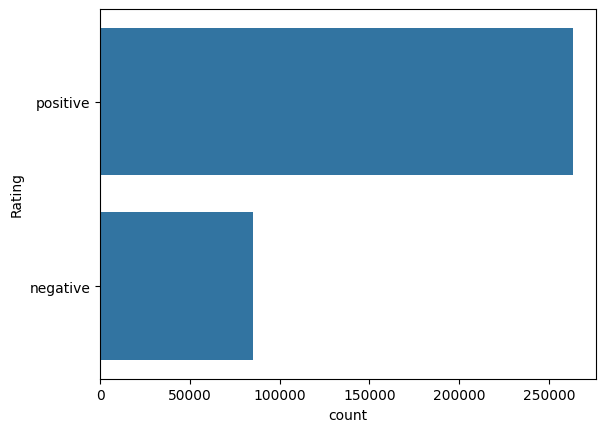

In [ ]:
# After Removing Duplicate rows
import seaborn as sns
sns.countplot(df_cleaned.Rating)

In [ ]:
## Preprocessing step for cleaning the Review columns and creating uniquely postive and negative words
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download('stopwords')

# Initialize the Snowball stemmer and stopwords
sno = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

def clean_html_tags(sentence):
    """Function to clean the word of any HTML tags."""
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def clean_punctuation(sentence):
    """Function to clean the word of any punctuation or special characters."""
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    return cleaned

def preprocess_text(sentence):
    """Function to preprocess text data."""
    if isinstance(sentence, str):
        filtered_words = []
        sentence = clean_html_tags(sentence)  # Remove HTML tags
        for word in sentence.split():
            for cleaned_word in clean_punctuation(word).split():
                if cleaned_word.isalpha() and len(cleaned_word) > 2:
                    if cleaned_word.lower() not in stop_words:
                        stemmed_word = sno.stem(cleaned_word.lower())
                        filtered_words.append(stemmed_word)
        return ' '.join(filtered_words)
    else:
        return ''  # Return empty string for non-string input

# Apply preprocessing to 'Reviews' column and create 'Cleaned_Text' column
df_cleaned['Cleaned_Text'] = df_cleaned['Reviews'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-36-947deb2df82c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_Text'] = df_cleaned['Reviews'].apply(preprocess_text)


In [ ]:
# Drop rows with missing values in 'CleanedText' column (if needed)
df_cleaned.dropna(subset=['Cleaned_Text'], inplace=True)

# Ensure 'CleanedText' column contains string values
df_cleaned['Cleaned_Text'] = df_cleaned['Cleaned_Text'].astype(str)

# Instantiate CountVectorizer and fit-transform the text data
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df_cleaned['Cleaned_Text'].values)

# Display the shape of the Bag-of-Words (BoW) matrix
print("Shape of Bag-of-Words matrix:", bow.shape)

<ipython-input-38-6743e9546753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=['Cleaned_Text'], inplace=True)
<ipython-input-38-6743e9546753>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_Text'] = df_cleaned['Cleaned_Text'].astype(str)


Shape of Bag-of-Words matrix: (348057, 46647)


In [ ]:
#Fiting the -means model and for this fit, we are using no of clusters = 7
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 7,init='k-means++',random_state=99)
model.fit(bow)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=99)

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
# which tells us that clusters are far away from each other
silhouette_score

NameError: name 'labels' is not defined

In [ ]:
# Giving Labels/assigning a cluster to each point/text
df_new = df_cleaned
df_new['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df_new.head(2)

In [ ]:
# How many points belong to each cluster -> using group by in pandas
df_new.groupby(['Bow Clus Label'])['Reviews'].count()

In [ ]:
#Refrence credit - to find the top 10 features of cluster centriod
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

In [ ]:
# Reading a review which belong to each group.
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df_new.iloc[df_new.groupby(['Bow Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print("_" * 70)

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
In this exercise, I learned how to train model using the following algorithms: MultinominalNB, SVM, KNN, Decision tree, Random Forest, XGBoost, Word2Vec, BERT and implementing the following evaluation
metrics on the algorithms: Accuracy, Recall, Precison, F-1 score. I also learned how to apply clustering methods to a dataset:K-means, DBSCAN, Hierarchical clustering, Word2Vec, BERT. It was
also a good exercise to learn how to provide comparisons of various evaluation metrics for different algorithms

'''